In [8]:
import matplotlib.pyplot as plt

from lls import LLS

In [9]:
def make_data(n):
    x=np.random.normal(4,1,n)
    y=x*2+5+np.random.random(n)
    return x,y
x_train,y_train=make_data(100)
lls=LLS(x_train,y_train)
lls.fit()

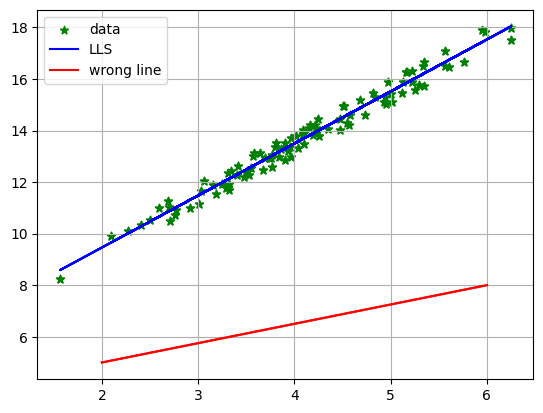

In [10]:
plt.scatter(x_train,y_train,marker="*",c="green")
plt.plot(x_train,lls.e_line,c="blue")
plt.plot((2,6),(5,8),c="red")
plt.grid()
#legend
plt.scatter(x_train,y_train,label="data",marker="*",c="green")
plt.plot(x_train,lls.e_line,c="blue",label="LLS")
plt.plot((2,6),(5,8),c="red",label="wrong line")
plt.legend()
plt.show()